<a href="https://colab.research.google.com/github/Just111n/algorithms/blob/main/Computer_Vision_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contact: haoxuan_qu@sutd.edu.sg



##Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

To use Numpy, we first need to import the `numpy` package:

In [ ]:
import numpy as np

###Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
a = [1, 2, 3]
print(type(a))

<class 'list'>


In [ ]:
a = np.array(a)  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])

<class 'numpy.ndarray'> (3,) 1 2 3


In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b, b.shape)

[[1 2 3]
 [4 5 6]] (2, 3)


In [ ]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0], b[-1, -1])

(2, 3)
1 2 4 6


Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros((2,2,6))  # Create an array of all zeros
print(a, a.shape)

[[[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]] (2, 2, 6)


In [ ]:
b = np.ones((10,10))   # Create an array of all ones
print(b)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [ ]:
x = np.random.randn(3,3)
print(x.shape)
print(x)

(3, 3)
[[ 0.88458095  0.888338    1.35360673]
 [-0.77227416 -1.27671389  0.50515107]
 [-0.56870924  0.80819735  0.81874743]]


In [ ]:
# Create an array with the same shape but filled with "0" or "1"
x_zeros = np.zeros_like(x)
x_ones = np.ones_like(x)

print(x)
print(x_zeros)
print(x_ones)

[[ 0.88458095  0.888338    1.35360673]
 [-0.77227416 -1.27671389  0.50515107]
 [-0.56870924  0.80819735  0.81874743]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


The "zeros_like" and "ones_like" are very useful sometimes, e.g., when we want to create a "mask" for the input images.

###Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3] # the same as a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.
print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

###Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.float32)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 float32


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

###Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


`*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(v*w)
print(np.dot(v, w))

219
[ 99 120]
219


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],
              [3,4],
              [5,6]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

21
[ 9 12]
[ 3  7 11]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

###Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3],
              [4,5,6],
              [7,8,9],
              [10, 11, 12]])
v = np.array([1, 0, 1])
# shape of x (4x3) shape of v (3,)
w = 2

# print(x+v)
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [ ]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [ ]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

##OpenCV

###How to read an image and convert to numpy.array

In [ ]:
import numpy as np
import cv2
# pip install opencv-python
from matplotlib import pyplot as plt

**[Optional]** Load your own image from Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The image is read as a numpy ndarray. All the basic operations can be applied to this image (numpy array).

In [ ]:
import os
from glob import glob

img_path = '/content/drive/MyDrive/cv/messi.jpeg' # You can replace the img_path with your own
img = cv2.imread(img_path)

print('The type of img is {}'.format(type(img)))
print('The shape of img is {}'.format(img.shape))
# print(img)


The type of img is <class 'numpy.ndarray'>
The shape of img is (576, 1024, 3)


The image read by opencv is in the formation of "BGR", meaning the channel order is "Blue", "Green", and "Red".

In [ ]:
print(img[500, 500, 0]) # Access one pixel in Blue channel
print(img[500, 500, 1]) # Access one pixel in Green channel
print(img[500, 500, 2]) # Access one pixel in Red channel

64
9
2


In [ ]:
area = img[200:400, 700:800]
print(type(area))
print(area.shape)

<class 'numpy.ndarray'>
(200, 100, 3)


###How to save a numpy array as an image

In [ ]:
cv2.imwrite("/content/drive/MyDrive/cv/cropped_messi.jpg", area)

True

###Image Filtering

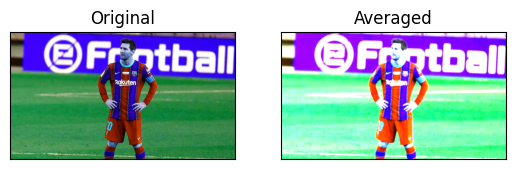

In [ ]:
kernel = np.ones((5,5),np.float32)/10
averaged = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(averaged),plt.title('Averaged')
plt.xticks([]), plt.yticks([])
plt.show()

###Image Translation

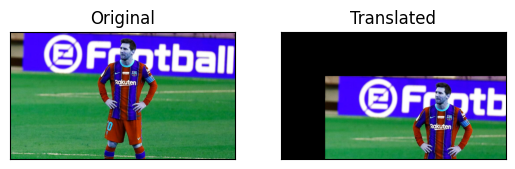

In [ ]:
rows, cols, _ = img.shape
M = np.float32([[1,0,200],[0,1,200]])
translated = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(translated),plt.title('Translated')
plt.xticks([]), plt.yticks([])
plt.show()

###Image Rotation

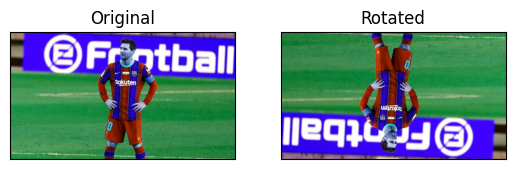

In [ ]:
rows, cols, _ = img.shape
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),180,1)
rotated = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(rotated),plt.title('Rotated')
plt.xticks([]), plt.yticks([])
plt.show()